In [3]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole

In [4]:
mol1 = Chem.MolFromSmiles("Cc1ccccc1")
mol2 = Chem.MolFromSmiles("Clc1ccccc1")

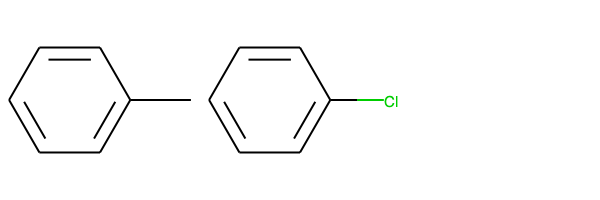

In [5]:
Draw.MolsToGridImage([mol1, mol2])

In [6]:
fp1 = AllChem.GetMorganFingerprint(mol1, 2)
fp2 = AllChem.GetMorganFingerprint(mol2, 2)

In [7]:
DataStructs.TanimotoSimilarity(fp1, fp2)

0.5384615384615384

## Virtual Screening

In [31]:
!wget http://files.docking.org/2D/EA/EAED.smi

--2019-03-09 09:11:55--  http://files.docking.org/2D/EA/EAED.smi
Resolving files.docking.org... 169.230.26.43
Connecting to files.docking.org|169.230.26.43|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13295986 (13M) [application/smil]
Saving to: 'EAED.smi.1'

EAED.smi.1          100%[===================>]  12.68M   177KB/s    in 74s     

2019-03-09 09:13:09 (176 KB/s) - 'EAED.smi.1' saved [13295986/13295986]



In [15]:
laninamivir = Chem.MolFromSmiles("CO[C@H]([C@H](O)CO)[C@@H]1OC(=C[C@H](NC(=N)N)[C@H]1NC(=O)C)C(=O)O")
laninamivir_fp = AllChem.GetMorganFingerprint(laninamivir, 2)

def calc_laninamivir_similarity(mol):
    fp = AllChem.GetMorganFingerprint(mol, 2)
    sim = DataStructs.TanimotoSimilarity(laninamivir_fp, fp)
    return sim

In [33]:
mols = []
with open("EAED.smi") as f:
    f.readline()
    for l in f:
        mol = Chem.MolFromSmiles(l[:-1])
        mols.append(mol)
print(len(mols))

195493


In [22]:
similar_mols =[]
for mol in mols:
    sim = calc_laninamivir_similarity(mol)
    if sim > 0.2:
        similar_mols.append((mol, sim))

In [24]:
similar_mols.sort(key=lambda x: x[1], reverse=True)

In [27]:
mols = [l[0] for l in similar_mols[:10]]

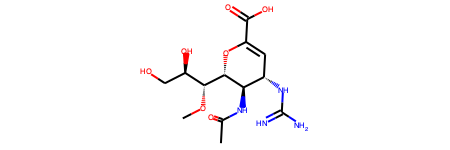

In [32]:
laninamivir

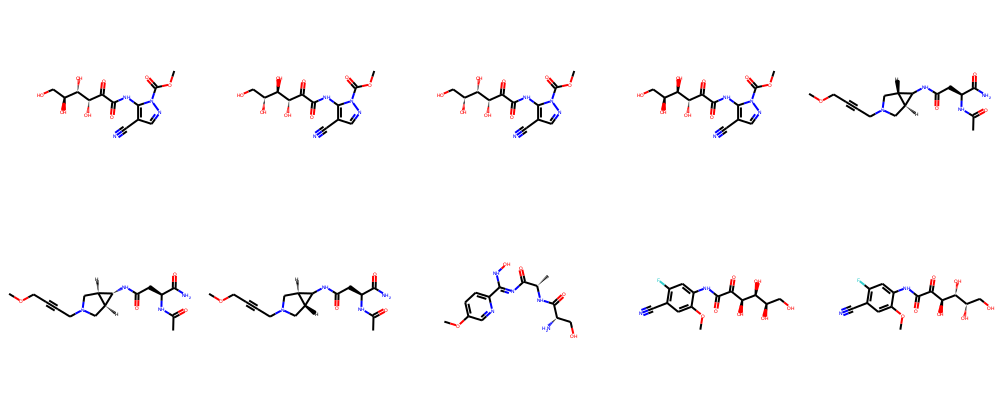

In [30]:
Draw.MolsToGridImage(mols, molsPerRow=5)

In [6]:
apx = Chem.MolFromSmiles("COc1ccc(cc1)n2nc(C(=O)N)c3CCN(C(=O)c23)c4ccc(cc4)N5CCCCC5=O")
rvx = Chem.MolFromSmiles("Clc1ccc(s1)C(=O)NC[C@H]2CN(C(=O)O2)c3ccc(cc3)N4CCOCC4=O")

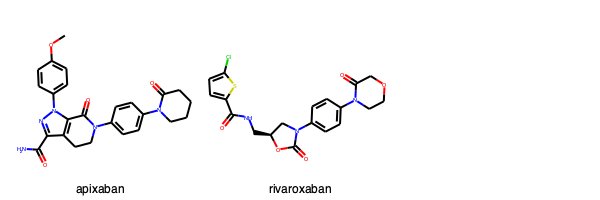

In [7]:
Draw.MolsToGridImage([apx, rvx], legends=["apixaban", "rivaroxaban"])

In [27]:
apx_fp = AllChem.GetMorganFingerprint(apx, 2)
rvx_fp = AllChem.GetMorganFingerprint(rvx, 2)

In [28]:
DataStructs.TanimotoSimilarity(apx_fp, rvx_fp)

0.40625